In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ROOT
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing

%matplotlib inline
%jsroot on

Welcome to JupyROOT 6.22/01


In [2]:
pion_features_data = pd.read_pickle("new_combined_data_pion_ene_std.pkl")
pion_features_data

,beamEnergy,trueBeamEnergy,lay_energy,totEne_std
469388,300.0,302.028625,"[0.6774013042449951, 3.8306031227111816, 0.745...","[58.38472819328308, 3185.633409622824, 5652.10..."
221341,100.0,99.577240,"[2.0719006061553955, 2.016815185546875, 1.2768...","[1547.1951704323292, 631.3814797792584, 787.53..."
351415,200.0,199.088165,"[0.9237810969352722, 1.8481943607330322, 1.052...","[13043.029094567522, 890.3392220679671, 0.0, 3..."
170813,50.0,49.566555,"[1.3247671127319336, 1.2322539389133453, 1.167...","[2736.0301661789417, 15.79646509885788, 0.6681..."
155352,50.0,49.580795,"[0.8254274129867554, 1.221725344657898, 1.0039...","[39.59376472234726, 509.28097496926785, 38.062..."
...,...,...,...,...
125043,50.0,49.747456,"[0.9296020269393921, 1.071818232536316, 0.9877...","[392.5351561307907, 670.2571065686643, 0.0, 3...."
445804,300.0,296.598419,"[355.851594209671, 237.71247899532318, 413.946...","[10965.104797500186, 1092.0883614122868, 621.0..."
256963,100.0,100.537315,"[0.7462937235832214, 0.9820317029953003, 1.276...","[5598.700338477269, 397.8625102080405, 0.0, 3...."
190051,50.0,49.442238,"[0.8751309514045715, 0.8454559445381165, 1.157...","[582.0988074243069, 532.9226724132895, 253.366..."


In [3]:
pion_features_data.loc[(pion_features_data.beamEnergy==20)].describe()

,beamEnergy,trueBeamEnergy
count,99504.0,99504.000000
mean,20.0,19.872639
std,0.0,0.781677
min,20.0,1.048469
25%,20.0,19.842665
50%,20.0,19.964919
75%,20.0,20.090376
max,20.0,21.095812


In [4]:
pion_features_data.loc[(pion_features_data.beamEnergy==50)].describe()

,beamEnergy,trueBeamEnergy
count,99504.0,99504.000000
mean,50.0,49.771790
std,0.0,1.677904
min,50.0,0.080586
25%,50.0,49.628825
50%,50.0,49.925409
75%,50.0,50.234388
max,50.0,51.249313


In [5]:
pion_features_data.loc[(pion_features_data.beamEnergy==100)].describe()

,beamEnergy,trueBeamEnergy
count,99504.0,99504.000000
mean,100.0,99.504616
std,0.0,3.936173
min,100.0,0.118692
25%,100.0,99.279066
50%,100.0,99.858723
75%,100.0,100.475655
max,100.0,101.468369


In [6]:
pion_features_data.loc[(pion_features_data.beamEnergy==200)].describe()

,beamEnergy,trueBeamEnergy
count,99504.0,99504.000000
mean,200.0,198.947159
std,0.0,8.619056
min,200.0,0.114726
25%,200.0,198.573349
50%,200.0,199.755440
75%,200.0,200.999344
max,200.0,202.769089


In [7]:
pion_features_data.loc[(pion_features_data.beamEnergy==300)].describe()

,beamEnergy,trueBeamEnergy
count,99505.0,99505.000000
mean,300.0,298.197784
std,0.0,15.282945
min,300.0,0.067563
25%,300.0,297.836914
50%,300.0,299.590942
75%,300.0,301.492371
max,300.0,304.126709


In [3]:
intr_resolution = np.array([0.781677/19.872637 , 1.677904/49.771793, 3.936173/99.504623, 8.619056/198.947144, 15.282945/298.197845])
intr_resolution

array([0.03933434, 0.03371195, 0.03955769, 0.04332335, 0.05125102])

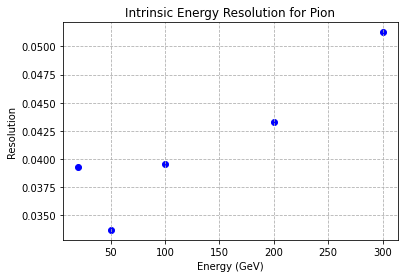

In [4]:
energy=[20, 50, 100, 200, 300]
plt.scatter(energy, intr_resolution, color="blue")
plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Intrinsic Energy Resolution for Pion" )
plt.grid(linestyle='--')
plt.show()

In [3]:
def features(df):
    return np.array(list(df.lay_energy) + list(df.totEne_std)  )

In [4]:
pion_features_data["features"] = pion_features_data.apply(features, axis=1)
pion_features_data

,beamEnergy,trueBeamEnergy,lay_energy,totEne_std,features
469388,300.0,302.028625,"[0.6774013042449951, 3.8306031227111816, 0.745...","[58.38472819328308, 3185.633409622824, 5652.10...","[0.6774013042449951, 3.8306031227111816, 0.745..."
221341,100.0,99.577240,"[2.0719006061553955, 2.016815185546875, 1.2768...","[1547.1951704323292, 631.3814797792584, 787.53...","[2.0719006061553955, 2.016815185546875, 1.2768..."
351415,200.0,199.088165,"[0.9237810969352722, 1.8481943607330322, 1.052...","[13043.029094567522, 890.3392220679671, 0.0, 3...","[0.9237810969352722, 1.8481943607330322, 1.052..."
170813,50.0,49.566555,"[1.3247671127319336, 1.2322539389133453, 1.167...","[2736.0301661789417, 15.79646509885788, 0.6681...","[1.3247671127319336, 1.2322539389133453, 1.167..."
155352,50.0,49.580795,"[0.8254274129867554, 1.221725344657898, 1.0039...","[39.59376472234726, 509.28097496926785, 38.062...","[0.8254274129867554, 1.221725344657898, 1.0039..."
...,...,...,...,...,...
125043,50.0,49.747456,"[0.9296020269393921, 1.071818232536316, 0.9877...","[392.5351561307907, 670.2571065686643, 0.0, 3....","[0.9296020269393921, 1.071818232536316, 0.9877..."
445804,300.0,296.598419,"[355.851594209671, 237.71247899532318, 413.946...","[10965.104797500186, 1092.0883614122868, 621.0...","[355.851594209671, 237.71247899532318, 413.946..."
256963,100.0,100.537315,"[0.7462937235832214, 0.9820317029953003, 1.276...","[5598.700338477269, 397.8625102080405, 0.0, 3....","[0.7462937235832214, 0.9820317029953003, 1.276..."
190051,50.0,49.442238,"[0.8751309514045715, 0.8454559445381165, 1.157...","[582.0988074243069, 532.9226724132895, 253.366...","[0.8751309514045715, 0.8454559445381165, 1.157..."


In [5]:
X_train = np.stack(pion_features_data.head(400000).features.values)
print(X_train.shape)
X_train

(400000, 84)


array([[6.77401304e-01, 3.83060312e+00, 7.45320022e-01, ...,
        5.65210791e+03, 4.29884577e+00, 4.27300167e+00],
       [2.07190061e+00, 2.01681519e+00, 1.27682829e+00, ...,
        7.87536926e+02, 3.52931738e+00, 4.04383469e+00],
       [9.23781097e-01, 1.84819436e+00, 1.05211258e+00, ...,
        0.00000000e+00, 3.13502049e+00, 3.66262460e+00],
       ...,
       [1.23805022e+00, 1.74057646e+00, 2.45989943e+00, ...,
        0.00000000e+00, 2.41022158e+00, 2.49511647e+00],
       [1.47009337e+00, 9.79087174e-01, 8.96061182e-01, ...,
        5.12885010e+02, 4.85954142e+00, 4.48002052e+00],
       [6.11183047e+00, 5.28918862e-01, 1.26809347e+00, ...,
        0.00000000e+00, 3.72681308e+00, 3.71169925e+00]])

In [7]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X

array([[-0.23869984, -0.22486179, -0.31571075, ...,  3.6729675 ,
         0.74796388,  0.76529112],
       [-0.198307  , -0.2618694 , -0.30860535, ...,  0.0906314 ,
        -0.07965752,  0.51877793],
       [-0.23156324, -0.26530985, -0.31160943, ..., -0.48932149,
        -0.50372056,  0.10871313],
       ...,
       [-0.22246017, -0.26750563, -0.29278961, ..., -0.48932149,
        -1.28323579, -1.14716649],
       [-0.21573885, -0.28304267, -0.31369559, ..., -0.111626  ,
         1.35098741,  0.98797972],
       [-0.08128706, -0.29222768, -0.30872212, ..., -0.48932149,
         0.13274746,  0.16150236]])

In [8]:
Y = pion_features_data.head(400000).trueBeamEnergy.values
print(Y)
Y.shape

[302.02863   99.57724  199.08817  ...  49.725105 202.17334   49.847126]


(400000,)

In [9]:
from tensorflow.python import keras
import neptune
from neptunecontrib.monitoring.keras import NeptuneMonitor
from keras.utils.vis_utils import plot_model

from keras.layers import Input, Dense, Concatenate, Dropout, BatchNormalization, Activation
from keras.models import Model

Using TensorFlow backend.


In [33]:
def squ_by_true(y_true, y_pred):
    error = y_true - y_pred
    squared_loss_by_true = tf.square(error) / y_true
    return squared_loss_by_true

In [14]:


neptune.init(project_qualified_name='nitish-kumar-kv/sandbox',
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiNGFmN2EzYmItM2I5NS00M2Q1LWFjMDktNDNiMmZlNDYzZWExIn0="
            )


params = {'epochs': 50,
              'batch_size': 32,
              'optimizer':"Adam",
              'activation':"relu",
              'lr': 0.0000597571,
              'units_per_layer': 1024,
              'num_hidden_layers': 1,
              'dropout': 0.231222,
              'loss_fuc': "mse",
              'val_splip':0.2,
              'particle':"pion",
              'model_type':"ene_std_dev_input at end"}

neptune.create_experiment(name='particle_energy_reconstruction', params=params)
    
    
    
model1 = keras.models.Sequential([
        keras.layers.Dense(params['units_per_layer'], input_shape=[84], activation="relu"),
        keras.layers.Dropout(params['dropout']),
        keras.layers.Dense(params['units_per_layer'], activation="relu"),
        keras.layers.Dropout(params['dropout'])
    ])


optimizer = tf.keras.optimizers.Adam(
        learning_rate=params["lr"])

model1.compile(optimizer=optimizer,
                  loss=tf.keras.losses.MeanSquaredError())

history1=model1.fit(X, Y,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        validation_split=0.2)
    

NVMLError: NVML Shared Library Not Found - GPU usage metrics may not be reported.


https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-274
Epoch 1/50
10000/10000 [==============================] - 109s 11ms/step - loss: 13171.7718 - val_loss: 2670.3835
Epoch 2/50
10000/10000 [==============================] - 107s 11ms/step - loss: 7318.2601 - val_loss: 2137.7849
Epoch 3/50
10000/10000 [==============================] - 106s 11ms/step - loss: 7010.5487 - val_loss: 1978.0028
Epoch 4/50
10000/10000 [==============================] - 91s 9ms/step - loss: 6933.7732 - val_loss: 2040.9008
Epoch 5/50
10000/10000 [==============================] - 91s 9ms/step - loss: 6902.5226 - val_loss: 2030.7159
Epoch 6/50
10000/10000 [==============================] - 90s 9ms/step - loss: 6900.1101 - val_loss: 1958.9054
Epoch 7/50
 9774/10000 [============================>.] - ETA: 2s - loss: 6883.2008

KeyboardInterrupt: 

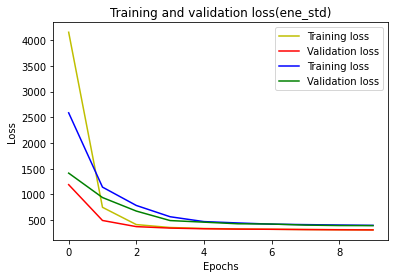

In [41]:
l1 = history1.history['loss']
vl1 = history1.history['val_loss']

l2 = history2.history['mean_squared_error']
vl2 = history2.history['val_mean_squared_error']

epochs = range( len(l) )

plt.plot(epochs, l1, 'y', label='Training loss')
plt.plot(epochs, vl1, 'r', label='Validation loss')

plt.plot(epochs, l2, 'b', label='Training loss')
plt.plot(epochs, vl2, 'g', label='Validation loss')

plt.title('Training and validation loss(ene_std)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

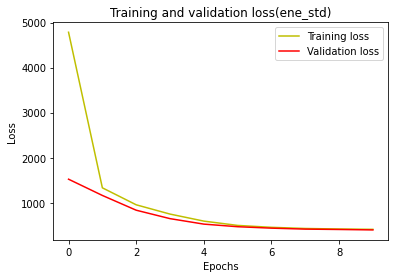

In [37]:
l = history.history['mean_squared_error']
vl = history.history['val_mean_squared_error']

epochs = range( len(l) )
plt.plot(epochs, l, 'y', label='Training loss')
plt.plot(epochs, vl, 'r', label='Validation loss')
plt.title('Training and validation loss(ene_std)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [58]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 79)           0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 1024)         81920       input_13[0][0]                   
__________________________________________________________________________________________________
activation_13 (Activation)      (None, 1024)         0           dense_13[0][0]                   
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 5)            0                                            
____________________________________________________________________________________________

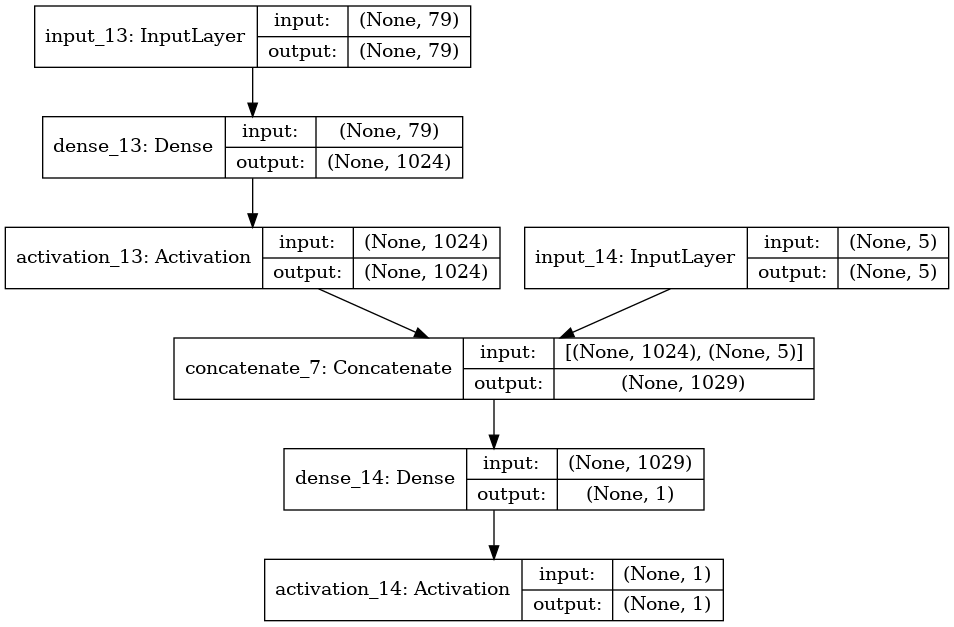

In [59]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [27]:
units_per_lay=[256, 512, 1024, 2048]

b_size = [32, 64, 128]

np.random.randint(4)

2

In [28]:
lr = np.exp(-np.random.uniform(1, 10, 5))
dropout = np.random.uniform(0.2, 0.5, 5)

units_per_layer = [units_per_lay[np.random.randint(3)] for i in range(5)]
batch_size = [b_size[np.random.randint(3)] for i in range(5)]

print(lr)
print(dropout)
print(units_per_layer)
print(batch_size)

[5.55398598e-02 6.60010359e-02 5.79687001e-05 1.91500878e-02
 4.83488637e-04]
[0.4709145  0.37507619 0.36604312 0.27047179 0.32291953]
[256, 512, 512, 1024, 1024]
[128, 128, 128, 128, 32]


In [21]:
train_loss=[]
val_loss=[]

for i in range(5):

    neptune.init(project_qualified_name='nitish-kumar-kv/sandbox',
        api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiNGFmN2EzYmItM2I5NS00M2Q1LWFjMDktNDNiMmZlNDYzZWExIn0="
                )


    params = {'epochs': 50,
              'batch_size': batch_size[i],
              'optimizer':"adam",
              'activation':"relu",
              'lr': lr[i],
              'units_per_layer': units_per_layer[i],
              'num_hidden_layers': 1,
              'dropout': 0,
              'loss_fuc': "mse",
              'val_splip':0.2,
              'particle':"pion",
              'model_type':"ene_std_dev_input at end"}

    neptune.create_experiment(name='particle_energy_reconstruction', params=params)
    
    
    
    lay_input = Input((79,))
    ene_std = Input((5,))


    X = Dense(params["units_per_layer"])(lay_input)
    X = Activation("relu")(X)




    concat_layer= Concatenate()([X, ene_std])
    output = Dense(1)(concat_layer)
    output = Activation("relu")(output)


    model = Model(inputs=[lay_input, ene_std], outputs=output)

    optimizer = tf.keras.optimizers.Adam(
                learning_rate=params["lr"])

    model.compile(optimizer=optimizer,
                 loss=tf.keras.losses.MeanSquaredError())
    
    
    
    history=model.fit([X1, X2], Y,
            epochs=params['epochs'],
            batch_size=params['batch_size'],
            validation_split=0.2,
            callbacks=[NeptuneMonitor()])
    
    l = history.history['loss']
    vl = history.history['val_loss']
    train_loss.append(l)
    val_loss.append(vl)
    
    print(i+1)

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-176
Train on 320000 samples, validate on 80000 samples
Epoch 1/50
  3392/320000 [..............................] - ETA: 1:19 - loss: 4479.3057

/home/nitish/.local/lib/python3.8/site-packages/keras/callbacks/callbacks.py:92: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.456476). Check your callbacks.
  warnings.warn(
/home/nitish/.local/lib/python3.8/site-packages/keras/callbacks/callbacks.py:92: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.228683). Check your callbacks.
  warnings.warn(


320000/320000 [==============================] - 11s 35us/step - loss: 777.9767 - val_loss: 529.5553
Epoch 2/50
320000/320000 [==============================] - 10s 31us/step - loss: 530.5912 - val_loss: 1109.9811
Epoch 3/50
320000/320000 [==============================] - 10s 30us/step - loss: 473.1293 - val_loss: 493.2780
Epoch 4/50
320000/320000 [==============================] - 11s 33us/step - loss: 443.3839 - val_loss: 363.1429
Epoch 5/50
320000/320000 [==============================] - 10s 31us/step - loss: 401.4602 - val_loss: 361.1336
Epoch 6/50
320000/320000 [==============================] - 10s 33us/step - loss: 396.6927 - val_loss: 427.9969
Epoch 7/50
320000/320000 [==============================] - 11s 35us/step - loss: 396.0852 - val_loss: 351.8927
Epoch 8/50
320000/320000 [==============================] - 12s 37us/step - loss: 428.0604 - val_loss: 420.7873
Epoch 9/50
320000/320000 [==============================] - 11s 34us/step - loss: 400.1333 - val_loss: 382.1996
Ep

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-177
Train on 320000 samples, validate on 80000 samples
Epoch 1/50
  4160/320000 [..............................] - ETA: 48s - loss: 27606.6482 

/home/nitish/.local/lib/python3.8/site-packages/keras/callbacks/callbacks.py:92: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.448728). Check your callbacks.
  warnings.warn(
/home/nitish/.local/lib/python3.8/site-packages/keras/callbacks/callbacks.py:92: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.224692). Check your callbacks.
  warnings.warn(


320000/320000 [==============================] - 11s 34us/step - loss: 3332.7594 - val_loss: 958.2568
Epoch 2/50
320000/320000 [==============================] - 10s 33us/step - loss: 642.1603 - val_loss: 499.9301
Epoch 3/50
320000/320000 [==============================] - 10s 30us/step - loss: 477.6691 - val_loss: 452.7744
Epoch 4/50
320000/320000 [==============================] - 9s 30us/step - loss: 445.5886 - val_loss: 430.7265
Epoch 5/50
320000/320000 [==============================] - 9s 29us/step - loss: 431.1864 - val_loss: 420.5282
Epoch 6/50
320000/320000 [==============================] - 9s 30us/step - loss: 422.6282 - val_loss: 413.0235
Epoch 7/50
320000/320000 [==============================] - 11s 33us/step - loss: 415.6263 - val_loss: 408.9194
Epoch 8/50
320000/320000 [==============================] - 10s 30us/step - loss: 409.2744 - val_loss: 399.8396
Epoch 9/50
320000/320000 [==============================] - 9s 29us/step - loss: 403.2722 - val_loss: 396.5543
Epoch 

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-178
Train on 320000 samples, validate on 80000 samples
Epoch 1/50
  5568/320000 [..............................] - ETA: 35s - loss: 13866.8585

/home/nitish/.local/lib/python3.8/site-packages/keras/callbacks/callbacks.py:92: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.432858). Check your callbacks.
  warnings.warn(
/home/nitish/.local/lib/python3.8/site-packages/keras/callbacks/callbacks.py:92: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.216998). Check your callbacks.
  warnings.warn(


320000/320000 [==============================] - 8s 24us/step - loss: 3907.7412 - val_loss: 1538.3961
Epoch 2/50
320000/320000 [==============================] - 7s 22us/step - loss: 1777.4396 - val_loss: 820.0728
Epoch 3/50
320000/320000 [==============================] - 7s 20us/step - loss: 1299.2274 - val_loss: 1656.1767
Epoch 4/50
320000/320000 [==============================] - 7s 22us/step - loss: 1186.0455 - val_loss: 1032.3227
Epoch 5/50
320000/320000 [==============================] - 7s 21us/step - loss: 1169.6846 - val_loss: 616.9983
Epoch 6/50
320000/320000 [==============================] - 7s 21us/step - loss: 1042.6041 - val_loss: 594.2251
Epoch 7/50
320000/320000 [==============================] - 7s 20us/step - loss: 692.5287 - val_loss: 552.1250
Epoch 8/50
320000/320000 [==============================] - 6s 20us/step - loss: 757.4452 - val_loss: 625.2558
Epoch 9/50
320000/320000 [==============================] - 7s 21us/step - loss: 652.4545 - val_loss: 532.5680
Epo

https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-179
Train on 320000 samples, validate on 80000 samples
Epoch 1/50
  7296/320000 [..............................] - ETA: 28s - loss: 4128.6138

/home/nitish/.local/lib/python3.8/site-packages/keras/callbacks/callbacks.py:92: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.447593). Check your callbacks.
  warnings.warn(
/home/nitish/.local/lib/python3.8/site-packages/keras/callbacks/callbacks.py:92: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.224313). Check your callbacks.
  warnings.warn(


320000/320000 [==============================] - 7s 22us/step - loss: 626.6687 - val_loss: 424.9787
Epoch 2/50
320000/320000 [==============================] - 6s 19us/step - loss: 421.1607 - val_loss: 359.0678
Epoch 3/50
320000/320000 [==============================] - 6s 18us/step - loss: 376.7990 - val_loss: 375.5257
Epoch 4/50
320000/320000 [==============================] - 6s 18us/step - loss: 357.7725 - val_loss: 319.3520
Epoch 5/50
320000/320000 [==============================] - 6s 18us/step - loss: 343.2350 - val_loss: 341.8939
Epoch 6/50
320000/320000 [==============================] - 6s 19us/step - loss: 328.0790 - val_loss: 336.8284
Epoch 7/50
320000/320000 [==============================] - 6s 19us/step - loss: 327.8552 - val_loss: 320.1638
Epoch 8/50
320000/320000 [==============================] - 6s 18us/step - loss: 322.1277 - val_loss: 335.2585
Epoch 9/50
320000/320000 [==============================] - 6s 19us/step - loss: 316.0696 - val_loss: 302.9781
Epoch 10/50


https://ui.neptune.ai/nitish-kumar-kv/sandbox/e/SAN-180
Train on 320000 samples, validate on 80000 samples
Epoch 1/50
 10240/320000 [..............................] - ETA: 19s - loss: 18782.5209

/home/nitish/.local/lib/python3.8/site-packages/keras/callbacks/callbacks.py:92: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.451331). Check your callbacks.
  warnings.warn(
/home/nitish/.local/lib/python3.8/site-packages/keras/callbacks/callbacks.py:92: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.226864). Check your callbacks.
  warnings.warn(


320000/320000 [==============================] - 4s 14us/step - loss: 1482.6099 - val_loss: 463.2058
Epoch 2/50
320000/320000 [==============================] - 3s 11us/step - loss: 436.7244 - val_loss: 424.2976
Epoch 3/50
320000/320000 [==============================] - 3s 10us/step - loss: 410.8954 - val_loss: 388.1830
Epoch 4/50
320000/320000 [==============================] - 4s 11us/step - loss: 391.0379 - val_loss: 367.9688
Epoch 5/50
320000/320000 [==============================] - 3s 10us/step - loss: 376.6943 - val_loss: 358.7681
Epoch 6/50
320000/320000 [==============================] - 3s 10us/step - loss: 367.6016 - val_loss: 357.7427
Epoch 7/50
320000/320000 [==============================] - 3s 10us/step - loss: 362.6518 - val_loss: 351.6707
Epoch 8/50
320000/320000 [==============================] - 3s 10us/step - loss: 356.6334 - val_loss: 361.5524
Epoch 9/50
320000/320000 [==============================] - 3s 11us/step - loss: 350.3338 - val_loss: 339.0590
Epoch 10/50

2021-02-01 14:27:32.337094: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-02-01 14:27:32.415862: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-02-01 14:27:32.416374: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2021-02-01 14:27:32.416818: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nitish/Root/lib:/home/nitish/Root/lib/:
2021-02-01 14:27:32.416987: W tensorflow/stream_executor/platfor

In [ ]:
n=0
l = train_loss[n-1]
vl = val_loss[n-1]

l = history.history['loss']
vl = history.history['val_loss']

epochs = range(1, len(l) + 1)
plt.plot(epochs, l, 'y', label='Training loss')
plt.plot(epochs, vl, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
x_test_set = pion_features_data.tail(497521-450000)
x_test_set

,beamEnergy,trueBeamEnergy,lay_energy,totEne_std
67467,20.0,20.153059,"[0.9292487502098083, 1.4994680881500244, 1.325...","[148.0664286017418, 73.69790729135275, 227.367..."
263358,100.0,100.901604,"[1.0738681554794312, 1.0422312021255493, 0.782...","[2671.301168113947, 718.4062968697399, 40.4892..."
429744,300.0,301.931000,"[1.190887212753296, 0.9109857678413391, 8.9380...","[94.213354408741, 5236.6724745910615, 1260.475..."
281567,100.0,99.275635,"[5.315865874290466, 17.029596507549286, 0.9630...","[679.5702064037323, 250.14908819645643, 2934.5..."
30108,20.0,19.327383,"[17.302144557237625, 20.476891815662384, 63.49...","[685.3240090385079, 19.54403907060623, 0.0, 2...."
...,...,...,...,...
125043,50.0,49.747456,"[0.9296020269393921, 1.071818232536316, 0.9877...","[392.5351561307907, 670.2571065686643, 0.0, 3...."
445804,300.0,296.598419,"[355.851594209671, 237.71247899532318, 413.946...","[10965.104797500186, 1092.0883614122868, 621.0..."
256963,100.0,100.537315,"[0.7462937235832214, 0.9820317029953003, 1.276...","[5598.700338477269, 397.8625102080405, 0.0, 3...."
190051,50.0,49.442238,"[0.8751309514045715, 0.8454559445381165, 1.157...","[582.0988074243069, 532.9226724132895, 253.366..."


In [88]:
X_test_1 = np.stack(pion_features_data.tail(497521-450000).lay_energy.values)
X_test_1

array([[0.92924875, 1.49946809, 1.32503605, ..., 0.        , 0.        ,
        0.        ],
       [1.07386816, 1.0422312 , 0.78228563, ..., 0.        , 0.        ,
        0.        ],
       [1.19088721, 0.91098577, 8.93800735, ..., 0.        , 0.        ,
        3.15682983],
       ...,
       [0.74629372, 0.9820317 , 1.27639806, ..., 0.        , 0.        ,
        0.        ],
       [0.87513095, 0.84545594, 1.15765285, ..., 0.        , 0.        ,
        0.        ],
       [1.51365137, 1.25849998, 1.65402579, ..., 0.        , 0.        ,
        0.        ]])

In [91]:
print((3.15682983-4.332662059476508)/21.521189277299964)

-0.05463602472548987


In [62]:
X_test_1 = preprocessing.StandardScaler().fit(X_train).transform(X_test_1)
X_test_1

array([[-0.22965495, -0.27202807, -0.30802151, ..., -0.22143173,
        -0.21747261, -0.20132075],
       [-0.22549918, -0.28137139, -0.31529773, ..., -0.22143173,
        -0.21747261, -0.20132075],
       [-0.22213653, -0.2840533 , -0.20596047, ..., -0.22143173,
        -0.21747261, -0.05463602],
       ...,
       [-0.23491233, -0.28260153, -0.30867356, ..., -0.22143173,
        -0.21747261, -0.20132075],
       [-0.23121007, -0.28539236, -0.31026548, ..., -0.22143173,
        -0.21747261, -0.20132075],
       [-0.21286162, -0.27695209, -0.30361101, ..., -0.22143173,
        -0.21747261, -0.20132075]])

In [66]:
sum(X_test_1[:,3])

-186.59004628269741

In [67]:
X_test_2 = np.stack(pion_features_data.head(497521-450000).totEne_std.values)
print(X_test_2.shape)
X_test_2 = preprocessing.StandardScaler().fit(X_train_2).transform(X_test_2)
X_test_2

(47521, 5)


array([[-0.6750389 ,  1.70904227,  3.67143182,  0.74790068,  0.76549322],
       [-0.35986574, -0.39576638,  0.09014213, -0.08000327,  0.51885359],
       [ 2.07374049, -0.18237455, -0.48964134, -0.50421107,  0.10857846],
       ...,
       [ 0.51123709, -0.30589998,  0.82234143,  0.31720279,  0.04741866],
       [-0.6767878 , -0.44121479, -0.33143658,  0.48396704,  1.6043219 ],
       [ 0.46296854,  0.86016804, -0.33781827,  0.29733983,  0.29045003]])

In [68]:
x_test_set["predicted_energy"] = model.predict([X_test_1, X_test_2])
x_test_set

<ipython-input-68-a05a96099efb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_set["predicted_energy"] = model.predict([X_test_1, X_test_2])


,beamEnergy,trueBeamEnergy,lay_energy,totEne_std,predicted_energy
67467,20.0,20.153059,"[0.9292487502098083, 1.4994680881500244, 1.325...","[148.0664286017418, 73.69790729135275, 227.367...",53.227379
263358,100.0,100.901604,"[1.0738681554794312, 1.0422312021255493, 0.782...","[2671.301168113947, 718.4062968697399, 40.4892...",104.969620
429744,300.0,301.931000,"[1.190887212753296, 0.9109857678413391, 8.9380...","[94.213354408741, 5236.6724745910615, 1260.475...",294.337280
281567,100.0,99.275635,"[5.315865874290466, 17.029596507549286, 0.9630...","[679.5702064037323, 250.14908819645643, 2934.5...",64.583778
30108,20.0,19.327383,"[17.302144557237625, 20.476891815662384, 63.49...","[685.3240090385079, 19.54403907060623, 0.0, 2....",29.270525
...,...,...,...,...,...
125043,50.0,49.747456,"[0.9296020269393921, 1.071818232536316, 0.9877...","[392.5351561307907, 670.2571065686643, 0.0, 3....",55.754517
445804,300.0,296.598419,"[355.851594209671, 237.71247899532318, 413.946...","[10965.104797500186, 1092.0883614122868, 621.0...",276.400085
256963,100.0,100.537315,"[0.7462937235832214, 0.9820317029953003, 1.276...","[5598.700338477269, 397.8625102080405, 0.0, 3....",105.741035
190051,50.0,49.442238,"[0.8751309514045715, 0.8454559445381165, 1.157...","[582.0988074243069, 532.9226724132895, 253.366...",59.027992


In [69]:
x_test_set.loc[(x_test_set.beamEnergy==20)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9424.0,9424.000000,9424.000000
mean,20.0,19.876648,31.203238
std,0.0,0.761921,14.063739
min,20.0,2.639390,0.000000
25%,20.0,19.842844,24.537311
50%,20.0,19.966789,27.847055
75%,20.0,20.091725,32.415625
max,20.0,21.095812,137.168076


In [70]:
x_test_set.loc[(x_test_set.beamEnergy==50)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9493.0,9493.000000,9493.000000
mean,50.0,49.782413,56.036160
std,0.0,1.594328,10.088909
min,50.0,18.020077,17.394939
25%,50.0,49.628960,50.366890
50%,50.0,49.934292,54.417786
75%,50.0,50.241192,59.290787
max,50.0,50.966721,149.429871


In [71]:
x_test_set.loc[(x_test_set.beamEnergy==100)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9546.0,9546.000000,9546.000000
mean,100.0,99.514053,101.404007
std,0.0,3.648157,9.338727
min,100.0,2.033318,40.447346
25%,100.0,99.278406,96.903389
50%,100.0,99.853195,101.241825
75%,100.0,100.473116,105.635525
max,100.0,101.392853,218.773544


In [72]:
x_test_set.loc[(x_test_set.beamEnergy==200)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9512.0,9512.000000,9512.000000
mean,200.0,198.937271,196.715561
std,0.0,9.207854,19.020052
min,200.0,0.114726,21.356056
25%,200.0,198.600941,191.923779
50%,200.0,199.756813,197.321053
75%,200.0,201.011787,202.751488
max,200.0,202.454834,317.136169


In [73]:
x_test_set.loc[(x_test_set.beamEnergy==300)].describe()

,beamEnergy,trueBeamEnergy,predicted_energy
count,9546.0,9546.000000,9546.000000
mean,300.0,297.819153,288.405334
std,0.0,18.115940,30.123543
min,300.0,1.008143,21.591442
25%,300.0,297.810028,288.123322
50%,300.0,299.584732,293.383942
75%,300.0,301.471245,298.185196
max,300.0,303.580872,340.498352


In [74]:
x_test_means = np.array([22.784109, 51.891449, 101.011993, 197.503555, 294.553650])
x_test_stds = np.array([10.859448, 8.626386, 10.710754, 21.374369, 34.456547])

resolution = x_test_stds/x_test_means
resolution

array([0.47662377, 0.16623907, 0.10603448, 0.10822271, 0.11697885])

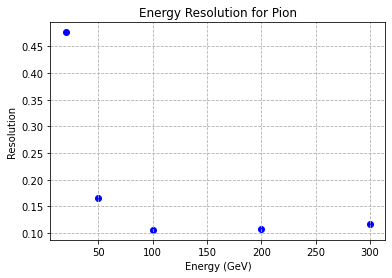

In [75]:
energy=[20, 50, 100, 200, 300]
plt.scatter(energy, resolution, color="blue")
plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Energy Resolution for Pion" )
plt.grid(linestyle='--')
plt.show()

In [76]:
energy=[20, 50, 100, 200, 300]
pred_energy_pion = []

for i in energy:
    pred_energy_pion.append(x_test_set.loc[x_test_set.beamEnergy==i].predicted_energy.values)
    
pred_energy_pion

[array([53.22738 , 29.270525, 31.745623, ..., 23.204933, 30.52685 ,
        24.818333], dtype=float32),
 array([71.47293 , 46.816216, 75.28105 , ..., 60.615204, 55.754517,
        59.027992], dtype=float32),
 array([104.96962 ,  64.58378 , 101.72766 , ...,  98.28288 ,  91.03214 ,
        105.741035], dtype=float32),
 array([198.18695, 199.12718, 172.90016, ..., 199.85558, 206.50583,
        199.8217 ], dtype=float32),
 array([294.33728, 290.18506, 287.07797, ..., 299.9455 , 276.4001 ,
        294.54224], dtype=float32)]

In [77]:
%jsroot on
c = ROOT.TCanvas()

H_pion_pred_20 = ROOT.TH1F("H_pion_pred_20","Reconstructed Energy Distribution (pion);Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_50 = ROOT.TH1F("H_pion_pred_50","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_100 = ROOT.TH1F("H_pion_pred_100","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_200 = ROOT.TH1F("H_pion_pred_200","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)
H_pion_pred_300 = ROOT.TH1F("H_pion_pred_300","Reconstructed Energy Distribution ;Energy(GeV);Normalized Entries",100,-10,400)



for i in range(pred_energy_pion[0].size):
    H_pion_pred_20.Fill(pred_energy_pion[0][i])
    
for i in range(pred_energy_pion[1].size):
    H_pion_pred_50.Fill(pred_energy_pion[1][i])
    
for i in range(pred_energy_pion[2].size):
    H_pion_pred_100.Fill(pred_energy_pion[2][i])
    
for i in range(pred_energy_pion[3].size):
    H_pion_pred_200.Fill(pred_energy_pion[3][i])
    
for i in range(pred_energy_pion[4].size):
    H_pion_pred_300.Fill(pred_energy_pion[4][i])
    


H_pion_pred_20.SetLineColor(1)
H_pion_pred_50.SetLineColor(2)
H_pion_pred_100.SetLineColor(3)
H_pion_pred_200.SetLineColor(4)
H_pion_pred_300.SetLineColor(5)




H_pion_pred_20.Draw()
H_pion_pred_50.Draw('same')
H_pion_pred_100.Draw('same')
H_pion_pred_200.Draw('same')
H_pion_pred_300.Draw('same')



#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion_pred_20 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion_pred_50 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion_pred_100 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion_pred_200 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion_pred_300 (Potential memory leak).


In [78]:
pion_means = []
pion_stds = []

pion_means.append(H_pion_pred_20.GetMean())
pion_means.append(H_pion_pred_50.GetMean())
pion_means.append(H_pion_pred_100.GetMean())
pion_means.append(H_pion_pred_200.GetMean())
pion_means.append(H_pion_pred_300.GetMean())

pion_stds.append(H_pion_pred_20.GetStdDev())
pion_stds.append(H_pion_pred_50.GetStdDev())
pion_stds.append(H_pion_pred_100.GetStdDev())
pion_stds.append(H_pion_pred_200.GetStdDev())
pion_stds.append(H_pion_pred_300.GetStdDev())

print(pion_means)
pion_stds

"""[23.69740265811497, 51.184431130896186, 98.93078198680693, 198.79585669314267, 291.9312128698761]

[13.38547331166946,
 9.771738730074944,
 9.429965476922193,
 19.5076033553981,
 31.158445977015752] for 512 ***1"""

[31.20323862507307, 56.036155670746275, 101.40400495035654, 196.71556581159516, 288.4053495138565]


'[23.69740265811497, 51.184431130896186, 98.93078198680693, 198.79585669314267, 291.9312128698761]\n\n[13.38547331166946,\n 9.771738730074944,\n 9.429965476922193,\n 19.5076033553981,\n 31.158445977015752] for 512 ***1'

In [44]:
#for noemal equation
mean_ne = [17.2850781998911, 45.22257179115259, 93.4851491359478, 192.47197039519313, 293.6494407575138]

std_ne = [5.844814967813348,
 10.826584570065949,
 18.538464133416028,
 33.86404941053829,
 47.147552259907265]



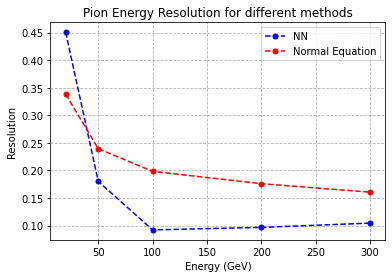

In [79]:
plt.plot(energy, (pion_stds)/np.array(pion_means), "b.", label="NN",  linestyle="--", color="b", markersize=10)
plt.plot(energy, np.array(std_ne)/np.array(mean_ne), "r.", label="Normal Equation",  linestyle="--", color="r", markersize=10)

plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Pion Energy Resolution for different methods")

#plt.ylim([0,.5])

plt.grid(linestyle='--')
plt.legend()
plt.show()

In [80]:
true_beamEnergy_mean =np.array([19.872637, 49.771793, 99.504623, 198.947144, 298.197845])

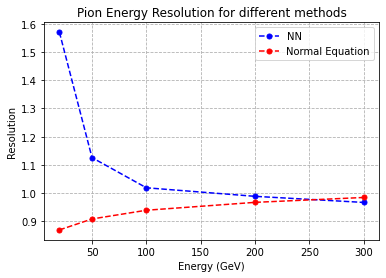

In [81]:
plt.plot(energy, np.array(pion_means)/true_beamEnergy_mean, "b.", label="NN",  linestyle="--", color="b", markersize=10)
plt.plot(energy, mean_ne/true_beamEnergy_mean, "r.", label="Normal Equation",  linestyle="--", color="r", markersize=10)

plt.xlabel("Energy (GeV)")
plt.ylabel("Resolution")
plt.title("Pion Energy Resolution for different methods")

#plt.ylim([0.5,.5])

plt.grid(linestyle='--')
plt.legend()
plt.show()